In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# LOAD THE DATA
file_path = r"C:\Users\siman\Downloads\Social Progress Index 2022.csv"  # Update if needed
df = pd.read_csv(file_path)

In [3]:
df.columns = df.columns.str.strip()

In [4]:
print("🔹 Original data shape:", df.shape)

🔹 Original data shape: (169, 18)


In [5]:
#  Remove duplicates
df = df.drop_duplicates()
print("🔹 After removing duplicates:", df.shape)

🔹 After removing duplicates: (169, 18)


In [6]:
# Drop rows with missing key values 
df = df.dropna(subset=['Country', 'Social Progress Score'])
print("🔹 After dropping rows with missing Country or Score:", df.shape)

🔹 After dropping rows with missing Country or Score: (169, 18)


In [7]:
#: Fill  missing numeric values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [8]:
df.rename(columns={
    'Social Progress Score': 'Score',
    'Basic Human Needs': 'Basic Needs',
    'Foundations of Wellbeing': 'Wellbeing',
    'Access to Advanced Education': 'Advanced Education'
}, inplace=True)


In [9]:
print("\n✅ Cleaned Column Names:\n", df.columns.tolist())


✅ Cleaned Column Names:
 ['Rank', 'Country', 'Score', 'Basic Needs', 'Wellbeing', 'Opportunity', 'Nutrition and Basic Medical Care', 'Water and Sanitation', 'Shelter', 'Personal Safety', 'Access to Basic Knowledge', 'Access to Information and Communications', 'Health and Wellness', 'Environmental Quality', 'Personal Rights', 'Personal Freedom and Choice', 'Inclusiveness', 'Advanced Education']


In [10]:
print("\n✅ Sample Data After Cleaning:")
print(df[['Country', 'Rank', 'Score', 'Basic Needs', 'Wellbeing', 'Opportunity']].head())


✅ Sample Data After Cleaning:
       Country  Rank  Score  Basic Needs  Wellbeing  Opportunity
0       Norway     1  90.74        91.26      90.86        90.11
1      Denmark     2  90.54        91.81      90.32        89.48
2      Finland     3  90.46        91.36      90.31        89.71
3  Switzerland     4  90.26        91.35      91.26        88.16
4      Iceland     5  89.54        91.18      90.44        87.00


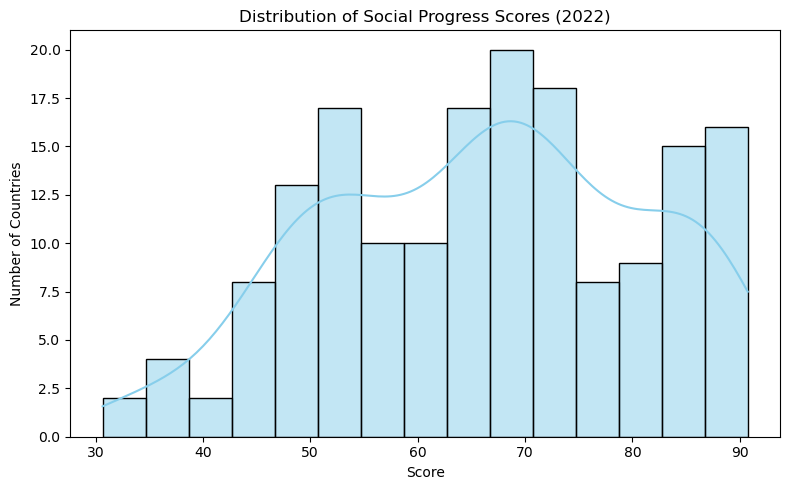

In [11]:

# 1. Histogram – Distribution of Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Social Progress Scores (2022)')
plt.xlabel('Score')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


C:\Users\siman\AppData\Local\Temp\ipykernel_3112\3958727042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Opportunity', y='Country', data=top_opportunity, palette='mako')


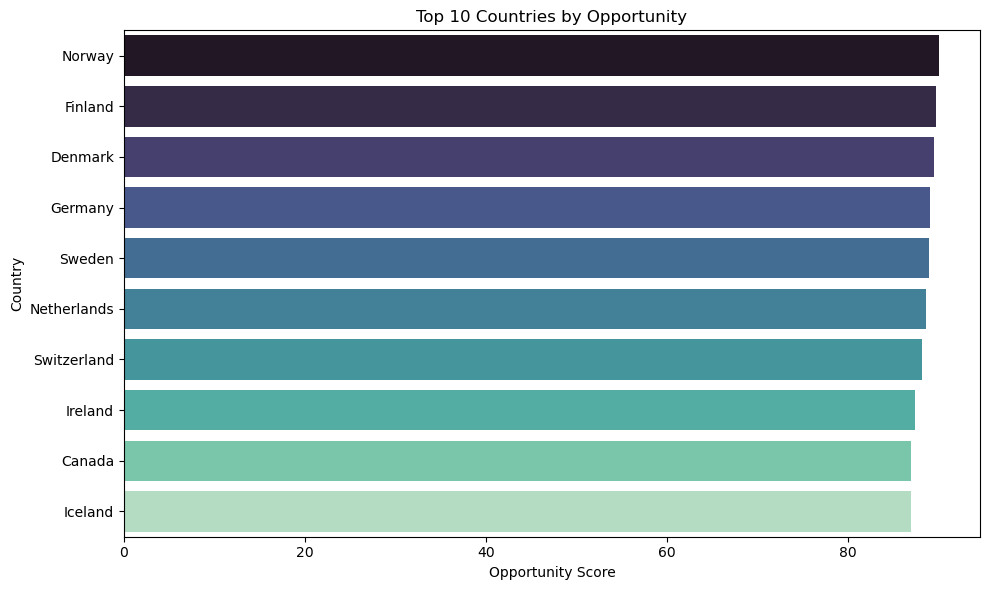

In [12]:
top_opportunity = df.sort_values(by='Opportunity', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Opportunity', y='Country', data=top_opportunity, palette='mako')
plt.title('Top 10 Countries by Opportunity')
plt.xlabel('Opportunity Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

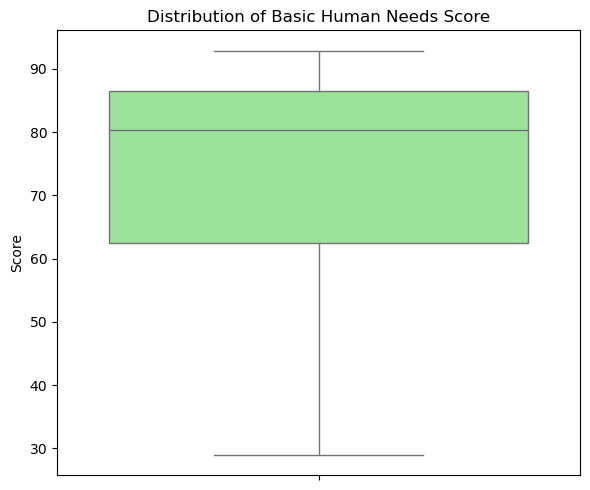

In [13]:

# 3. Box Plot Basic Needs
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Basic Needs'], color='lightgreen')
plt.title('Distribution of Basic Human Needs Score')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

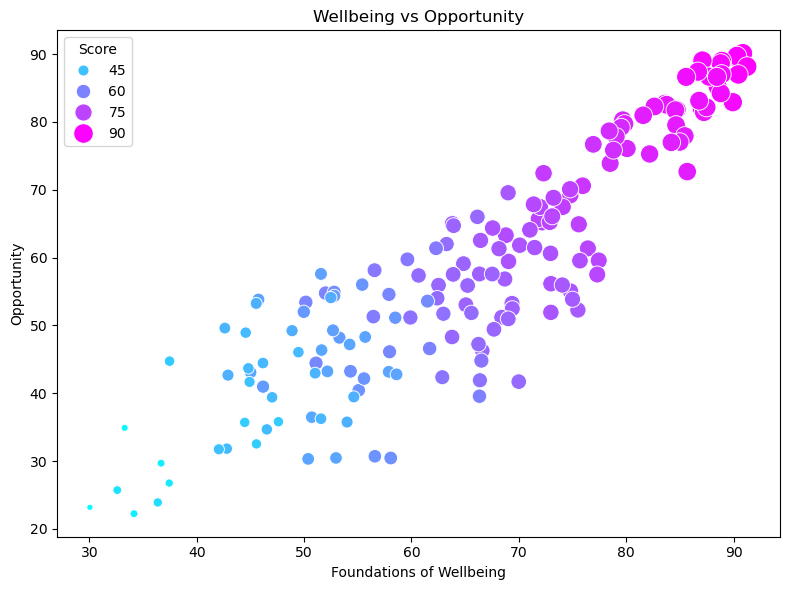

In [14]:
# 4. Scatter  Wellbeing vs Opportunity
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Wellbeing', y='Opportunity', data=df,
    hue='Score', palette='cool', size='Score', sizes=(20, 200)
)
plt.title('Wellbeing vs Opportunity')
plt.xlabel('Foundations of Wellbeing')
plt.ylabel('Opportunity')
plt.tight_layout()
plt.show()